 # Название проекта

**Прогнозирование оттока клиентов оператора связи**

## Описание проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия.

## Описание данных


Данные состоят из файлов, полученных из разных источников:

- `contract_new.csv` — информация о договоре;
- `personal_new.csv` — персональные данные клиента;
- `internet_new.csv` — информация об интернет-услугах;
- `phone_new.csv` — информация об услугах телефонии.

## Описание полей данных

• BeginDate – дата начала пользования услугами,

• EndDate – дата окончания пользования услугами,

• Type – тип оплаты: ежемесячный, годовой и тд,

• PaperlessBilling – электронный платёжный документ,

• PaymentMethod – способ оплаты,

• MonthlyCharges – ежемесячные траты на услуги,

• TotalCharges – всего потрачено денег на услуги

• Dependents – наличие иждивенцев

• Senior Citizen – наличие пенсионного статуса по возрасту

• Partner – наличие супруга(и)

• MultipleLines – наличие возможности ведения параллельных линий во
время звонка

In [1]:
import pandas as pd

***Загрузим и ознакомимся с данными о договре***

In [2]:
contract = pd.read_csv('contract_new.csv')

In [3]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [4]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


Итак, мы видим пропусков в данных нет, тип данных во всех столбцах кроме ежемесячных трат на услуги представлен в виде  object, надо будет изменять по необходимости.

In [5]:
#Проверим дубликаты
contract.duplicated().sum()

0

Дубликатов нет

В Столбцах Type, PaperlessBilling, PaymentMethod  категориальные признаки, поэтому менять тип данных не будем.

Рассмотрим столбец TotalCharges

In [6]:
contract['TotalCharges'].value_counts()

           11
20.45       6
101.0       5
255.0       4
732.6       4
           ..
1587.3      1
44.75       1
5180.43     1
732.54      1
3381.75     1
Name: TotalCharges, Length: 6658, dtype: int64

In [7]:
missing_rows = contract.loc[contract['TotalCharges'] == ' ']

In [8]:
missing_rows

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


Итак, мы видим, что это все новые клиенты которые пришли 1.02.2020, заполнять эти пропуски не будем, целесообразнее удалить эти строки, их все 11 штук.

In [9]:
contract = contract.loc[contract['TotalCharges'] != ' ']

Теперь поменям тип данных в столбце TotalCharges на float64

In [10]:
contract['TotalCharges'] = contract['TotalCharges'].astype(float)

In [11]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   BeginDate         7032 non-null   object 
 2   EndDate           7032 non-null   object 
 3   Type              7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   float64
dtypes: float64(2), object(6)
memory usage: 494.4+ KB


Также, рассмотрим столбец EndDate, из него в последствии мы сделаем целевой признак, ушел клиент или остался. Но также, на основе этого столбца, нам необходимо вычислить срок, в течении которого человек является клиентом компании. Займемся этим позже.

***Загрузим и ознакомимся с данными о персональных данных клиента***

In [12]:
personal = pd.read_csv('personal_new.csv')   

In [13]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [14]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


Итак, пропусков в данных нет, во всех столбцах категориальные данные, но в столбце SeniorCitizen тип данных int64, заменим его на object

In [15]:
personal['SeniorCitizen'] = personal['SeniorCitizen'].map({1: 'Yes', 0: 'No'})

In [16]:
personal['SeniorCitizen'] = personal['SeniorCitizen'].astype(object)

In [17]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   object
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: object(5)
memory usage: 275.2+ KB


In [18]:
personal['SeniorCitizen'].value_counts()

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

In [19]:
#Проверим дубликаты
personal.duplicated().sum()

0

***Загрузим и ознакомимся с данными об интернет-услугах***

In [20]:
try:
    internet = pd.read_csv('internet_new.csv')
except:
    internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet_new.csv')

In [21]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [22]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [23]:
#Проверим дубликаты
internet.duplicated().sum()

0

Здесь все столбцы категориальные, тип данных правильный.

***Загрузим и ознакомимся с данными об услугах телефонии***

In [24]:
phone = pd.read_csv('phone_new.csv')

In [25]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [26]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Здесь все столбцы категориальные, тип данных правильный.

**Объединим таблицы**

In [27]:
#Объединим  таблицы contract и personal, должны остаться только общие ID, так как в contract мы удаляли строки
merged_df = pd.merge(contract, personal, on='customerID')

In [28]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   BeginDate         7032 non-null   object 
 2   EndDate           7032 non-null   object 
 3   Type              7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   gender            7032 non-null   object 
 9   SeniorCitizen     7032 non-null   object 
 10  Partner           7032 non-null   object 
 11  Dependents        7032 non-null   object 
dtypes: float64(2), object(10)
memory usage: 714.2+ KB


In [29]:
# Присоединим таблицу  internet
merged_internet = pd.merge(merged_df, internet, on='customerID', how='left')

In [30]:
merged_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   BeginDate         7032 non-null   object 
 2   EndDate           7032 non-null   object 
 3   Type              7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   gender            7032 non-null   object 
 9   SeniorCitizen     7032 non-null   object 
 10  Partner           7032 non-null   object 
 11  Dependents        7032 non-null   object 
 12  InternetService   5512 non-null   object 
 13  OnlineSecurity    5512 non-null   object 
 14  OnlineBackup      5512 non-null   object 
 15  DeviceProtection  5512 non-null   object 
 16  TechSupport       5512 non-null   object 


In [31]:
merged_internet.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,No,Yes,No,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,Male,No,No,No,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,Female,No,No,No,Fiber optic,No,No,No,No,No,No


In [32]:
# Присоединим таблицу phone и получим итоговый датасет
data = pd.merge(merged_internet, phone, on='customerID', how='left')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   BeginDate         7032 non-null   object 
 2   EndDate           7032 non-null   object 
 3   Type              7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   gender            7032 non-null   object 
 9   SeniorCitizen     7032 non-null   object 
 10  Partner           7032 non-null   object 
 11  Dependents        7032 non-null   object 
 12  InternetService   5512 non-null   object 
 13  OnlineSecurity    5512 non-null   object 
 14  OnlineBackup      5512 non-null   object 
 15  DeviceProtection  5512 non-null   object 
 16  TechSupport       5512 non-null   object 


Итак, мы получили итоговый датафрейм, с которым будем работать, очевидно в нем есть пропуски, все они в категориальных столбцах, поэтому поставим заглушки 'unknown'

In [34]:
data = data.fillna('unknown')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   BeginDate         7032 non-null   object 
 2   EndDate           7032 non-null   object 
 3   Type              7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   gender            7032 non-null   object 
 9   SeniorCitizen     7032 non-null   object 
 10  Partner           7032 non-null   object 
 11  Dependents        7032 non-null   object 
 12  InternetService   7032 non-null   object 
 13  OnlineSecurity    7032 non-null   object 
 14  OnlineBackup      7032 non-null   object 
 15  DeviceProtection  7032 non-null   object 
 16  TechSupport       7032 non-null   object 


**Создадим столбец с целевым признаком и преобразуем его**

In [36]:
#Посмотрим значения столбца
data['EndDate'].value_counts()

No            5931
2020-01-01      39
2019-12-01      38
2018-11-01      35
2019-09-01      32
              ... 
2014-12-01       2
2015-04-01       2
2014-11-01       1
2014-06-01       1
2014-10-01       1
Name: EndDate, Length: 67, dtype: int64

In [37]:
#Добавим столбец с целевым признаком
data['Exited'] = data['EndDate'].copy()

In [38]:
#Заменим все значения, где проставлена дата на 1, то есть клиент ушел
data['Exited'] = data['Exited'].map(lambda x: 1 if x != "No" else x)

In [39]:
#Заменим все значения, где No  на 0, то есть клиент остался
data['Exited']  = data['Exited'] .replace("No", 0)

In [40]:
data['Exited'].value_counts(normalize=True)

0    0.84343
1    0.15657
Name: Exited, dtype: float64

Итак, мы видим явный дисбаланс классов, 84% оставшихся клиентов против 16% ушедших.

**Теперь создадим столбец, где будет отражена продолжительность договора клиента**

In [41]:
# Заменим в столбце EndDate значения No на 2020-02-01, так как данные актуальны на эту дату
data['EndDate'] = data['EndDate'].replace("No", '2020-02-01')

In [42]:
data['EndDate'].value_counts()

2020-02-01    5931
2020-01-01      39
2019-12-01      38
2018-11-01      35
2019-09-01      32
              ... 
2015-04-01       2
2014-12-01       2
2014-06-01       1
2014-11-01       1
2014-10-01       1
Name: EndDate, Length: 67, dtype: int64

In [43]:
# Преобразуем столбцы в тип данных datetime
data['EndDate'] = pd.to_datetime(data['EndDate'])
data['BeginDate'] = pd.to_datetime(data['BeginDate'])

In [44]:
#Вычислим продолжительность и сохраненим в новый столбец
data['duration'] = data['EndDate'] - data['BeginDate']

In [45]:
data['duration']

0        31 days
1      1036 days
2       123 days
3      1371 days
4       153 days
          ...   
7027    730 days
7028   2191 days
7029    337 days
7030    215 days
7031   2010 days
Name: duration, Length: 7032, dtype: timedelta64[ns]

In [46]:
# Преобразование timedelta64 в дни
data['duration'] = data['duration'].dt.days

In [47]:
data['duration'].value_counts()

2191    265
153     249
92      243
31      236
123     236
       ... 
789       1
305       1
121       1
2068      1
28        1
Name: duration, Length: 250, dtype: int64

Теперь нам не понадобятся столбцы EndDate и BeginDate, а также customerID не нужен нам для целей машинного обучения, поэтому удалим их.

In [48]:
data = data.drop(['EndDate', 'BeginDate', 'customerID'], axis=1)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7032 non-null   object 
 1   PaperlessBilling  7032 non-null   object 
 2   PaymentMethod     7032 non-null   object 
 3   MonthlyCharges    7032 non-null   float64
 4   TotalCharges      7032 non-null   float64
 5   gender            7032 non-null   object 
 6   SeniorCitizen     7032 non-null   object 
 7   Partner           7032 non-null   object 
 8   Dependents        7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  MultipleLines     7032 non-null   object 


# План работы
 - EDA
 - Разделить исходные данные на обучающую и тестовую выборки 
 - Провести кодирование категориальных признаков
 - Создадим переменные для признаков и целевого признака
 - Обучение  моделей с подбором гиперпараметров
 - Выбрать  лучшую модель
 - Провести финальное тестирование

# EDA

In [50]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from catboost import CatBoostRegressor, Pool

***Посмотрим на распределение клиентов по длительности договора***

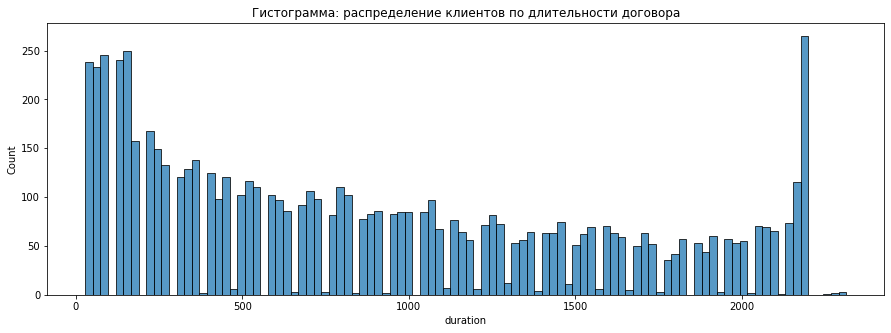

In [51]:
plt.figure(figsize=(15,5))  
sns.histplot(data['duration'],bins=100)
plt.title("Гистограмма: распределение клиентов по длительности договора");

Text(0.5, 1.0, 'График ящик с усами: распределение клиентов по длительности договора')

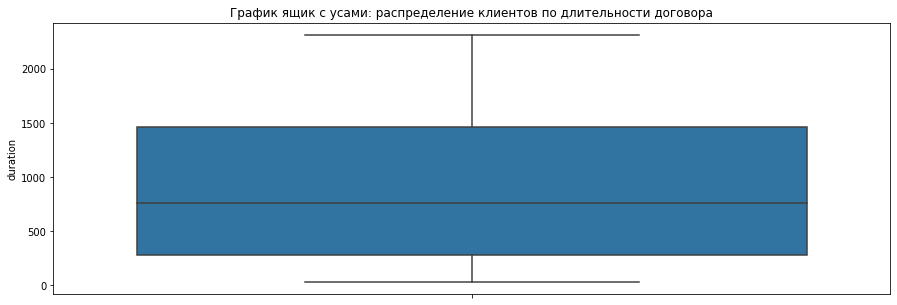

In [52]:
plt.figure(figsize=(15,5))  
sns.boxplot(y="duration", data=data);
plt.title("График ящик с усами: распределение клиентов по длительности договора")

In [53]:
data['duration'].describe()

count    7032.000000
mean      899.961320
std       682.738777
min        28.000000
25%       276.000000
50%       761.000000
75%      1461.000000
max      2314.000000
Name: duration, dtype: float64

Итак, мы видим что средняя длительность договора около 900 дней. Но величина распределена не равнономерно, большое количество договоров со сроком до 200 дней, а также большое колиество со сроком свыше 2000 дней.

***Посмотрим на распределение клиентов по ежемесячным тратам на услуги***

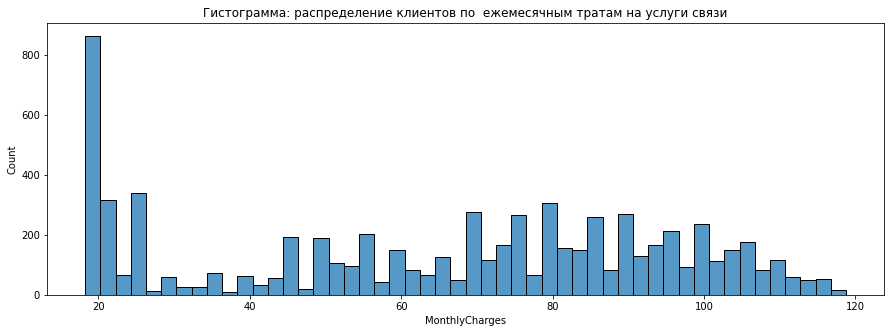

In [54]:
plt.figure(figsize=(15,5))  
sns.histplot(data['MonthlyCharges'],bins=50)
plt.title("Гистограмма: распределение клиентов по  ежемесячным тратам на услуги связи");

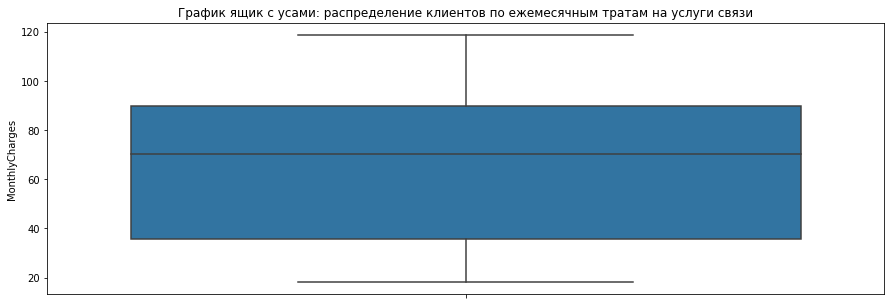

In [55]:
plt.figure(figsize=(15,5))  
sns.boxplot(y="MonthlyCharges", data=data);
plt.title("График ящик с усами: распределение клиентов по ежемесячным тратам на услуги связи");

In [56]:
data['MonthlyCharges'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

Итак, мы видим что средняя плата за ежемесячные услуги связи составляет около 65 ден.ед. Но наблюдается большое количество пользвателей, которые платят до 20 ден. ед.

***Построим матрицу коррелиции для численных признаков ( используем корреляцию Спирмена)***

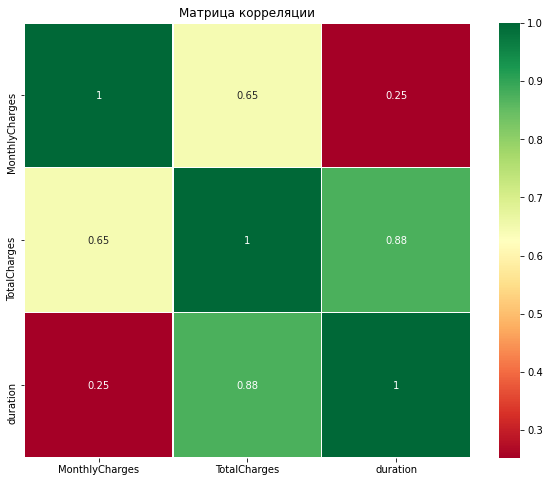

In [57]:
data_corr = data.drop('Exited', axis=1)
correlation_matrix = data_corr.corr(method='spearman')

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', linewidths=0.2)
plt.title('Матрица корреляции')
plt.show()

Видим весомую корреляцию между совокупными затратами на услуги связи и длительностью договора, что логично.

In [58]:
! pip install phik

In [59]:
import phik

interval columns not set, guessing: ['MonthlyCharges', 'TotalCharges', 'Exited', 'duration']


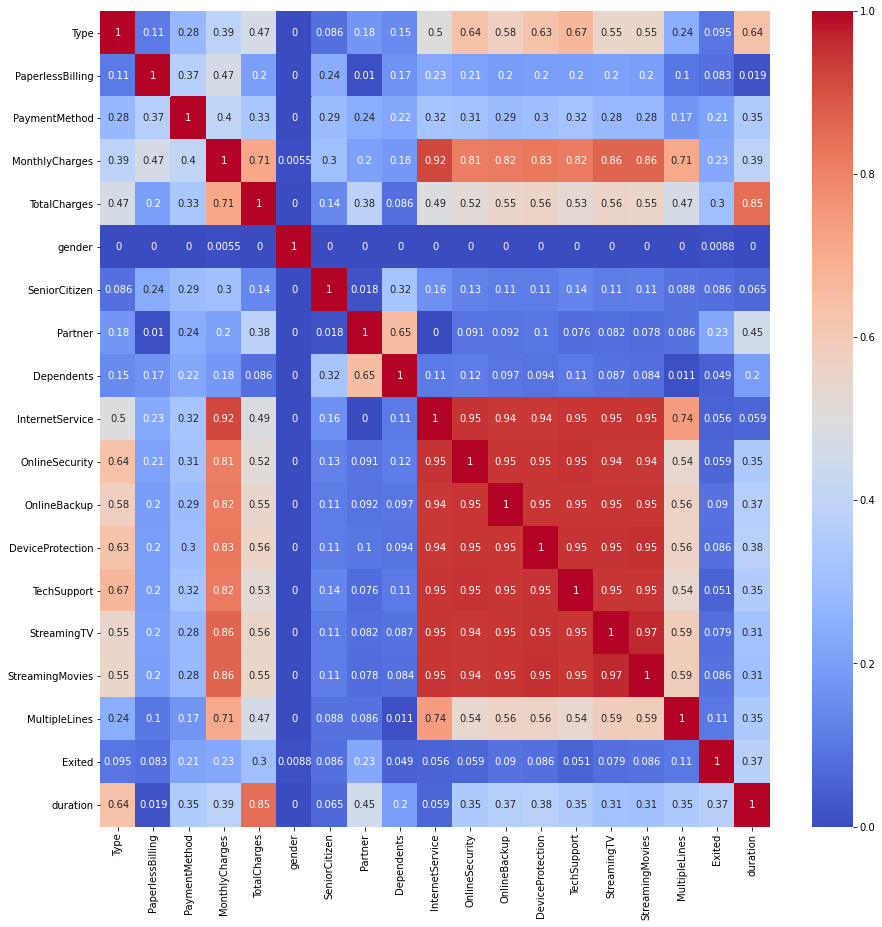

In [60]:
# Вычисление матрицы корреляции phi_k

correlation_matrix1 = data.phik_matrix()

plt.figure(figsize=(15,15))
# Построение тепловой карты
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')

# Отображение плота

plt.show()

Итак, мы видим наличие сильной корреляции в зоне интернет сервисов. Можно предположить если есть услуга интернет сервис, значит и все остальные услуги OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingT,  StreamingMovies тоже подключены. Соответственно эти стобцы для дальнейшего построения модели машинного обучения нам не нужны и можно их удалить.

In [61]:
#Удаление столбцов OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
columns_drop = ['OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
data = data.drop(columns=columns_drop)

interval columns not set, guessing: ['Exited']


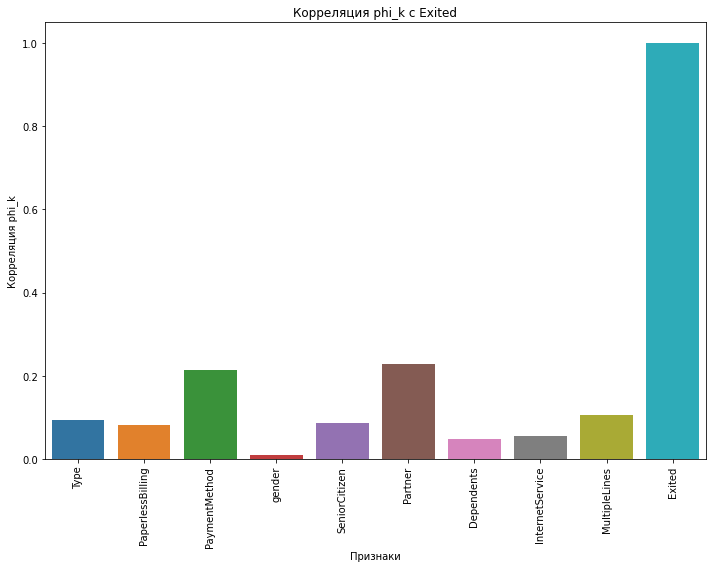

In [62]:
columns_for_drop = ['duration', 'MonthlyCharges', 'TotalCharges']
data_phik_target = data.drop(columns=columns_for_drop)

# Вычисление матрицы корреляции phi_k
correlation_matrix = data_phik_target.phik_matrix()

# Выбор столбца, содержащего целевую переменную
target_column = 'Exited'

# Получение корреляции с таргетом
correlation_with_target = correlation_matrix[target_column]

# Создание фигуры с заданными размерами
plt.figure(figsize=(10, 8))

# Построение плота корреляции
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)

# Настройка осей и названия графика
plt.xlabel('Признаки')
plt.ylabel('Корреляция phi_k')
plt.title(f'Корреляция phi_k с {target_column}')

# Вывод плота
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



Ну также сильной корреляции какого-либо категориального признака с таргетом не обнаружено.

***Проверка на дисбаланс классов, чувствительность метрики к дисбалансу***

Ранее мы провели оценку дисбаланса классов, выяснили что дисбаланс присутствует, соотношение 84 на 16%.
Метрика AUC-ROC не является чувствительной к дисбалансу классов. AUC-ROC оценивает качество модели, измеряя ее способность различать между классами. Она учитывает все возможные пороги классификации и оценивает суммарное качество классификации. Поэтому балансировкой заниматься не будем.

## Деление на выборки

***Разделим датасет на тестовую и обучающую выборки, для тестовой оставим 25%***

In [63]:
data_train, data_test = train_test_split(data, test_size=0.25, random_state=220523)

In [64]:
#Проверим размеры выборок
len(data_train)

5274

In [65]:
len(data_test)

1758

***Создадим переменные для признаков и целевого признака***

In [66]:
features_train = data_train.drop(['Exited'], axis=1)
target_train = data_train['Exited']
features_test = data_test.drop(['Exited'], axis=1)
target_test = data_test['Exited']

## Обучим модели

**LogisticRegression**

In [67]:
!pip install scikit-learn==1.1.3

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [69]:
# В переменную numeric добавим численные признаки
numeric_features = ['duration', 'MonthlyCharges', 'TotalCharges']

In [70]:
# В переменную categorical_features добавим категориальные признаки
categorical_features = (['Type', 'PaperlessBilling', 'PaymentMethod', 
                         'gender','SeniorCitizen','Partner',
                         'Dependents', 'InternetService','MultipleLines'])

In [71]:
# Определение пайплайна для предобработки признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_features),  # Стандартизация численных признаков
        ('categorical', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)  # Кодирование категориальных признаков
    ])

In [72]:
# Определение модели логистической регрессии
model = LogisticRegression(random_state=220523)

In [73]:
# Создание пайплайна
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

In [74]:
# Определение сетки параметров для GridSearchCV
param_grid = {
    'model__C': [0.1, 1, 10]
}

In [75]:
# Создание объекта GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=4, scoring='roc_auc')

In [76]:
grid_search.fit(features_train, target_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         StandardScaler(),
                                                                         ['duration',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('categorical',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Type',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod',
                                                                          'gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'InternetService',
                                                                          'MultipleLines'])])),
                                       ('model',
                                        LogisticRegression(random_state=220523))]),
             param_grid={'model__C': [0.1, 1, 10]}, scoring='roc_auc')

In [77]:
# Получение лучшей модели
best_model = grid_search.best_estimator_

# Получение лучшего score
best_score = grid_search.best_score_

In [78]:
print(best_score)

0.7528496753457077


Итак, полученный roc_auc  составляет 0.75, не дотягивает до целевого результата, очевидно модель логистической регрессии не лучший вариант.

**CatBoostClassifier**

CatBoost может сам кодировать категории из типа данных 'object' и 'category', но эта кодровка занимает дополнительное время. Будем кодировать OE, чтобы получилось быстрее.

In [79]:
from sklearn.preprocessing import OrdinalEncoder
from catboost import CatBoostClassifier

In [80]:
# Определение модели CatBoostClassifier
model_cb = CatBoostClassifier(random_state=220523, verbose=False)

In [81]:

# Определение пайплайна для предобработки признаков
preprocessor_cb = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_features),  # Стандартизация численных признаков
        ('categorical', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features)  # Кодирование категориальных признаков
    ])



In [82]:
# Создание пайплайна
pipeline_cb = Pipeline([
    ('preprocessor', preprocessor_cb),
    ('model', model_cb)
])


In [83]:
# Определение сетки параметров для GridSearchCV
param_grid_cb = {
    'model__learning_rate': [0.1, 0.01, 0.001],  # Скорость обучения модели CatBoostClassifier
    'model__depth': [5, 7]  # Глубина дерева модели CatBoostClassifier
}

In [84]:
# Создание объекта GridSearchCV
grid_search_cb = GridSearchCV(pipeline_cb, param_grid_cb, cv=5, scoring='roc_auc', verbose=0)

In [85]:
# Обучение модели с подбором параметров
grid_search_cb.fit(features_train, target_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         StandardScaler(),
                                                                         ['duration',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('categorical',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Type',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod',
                                                                          'gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'InternetService',
                                                                          'MultipleLines'])])),
                                       ('model',
                                        <catboost.core.CatBoostClassifier object at 0x7fde007fdd30>)]),
             param_grid={'model__depth': [5, 7],
                         'model__learning_rate': [0.1, 0.01, 0.001]},
             scoring='roc_auc')

In [86]:
# Получение лучшей модели
best_model_cb = grid_search_cb.best_estimator_

# Получение лучшего score
best_score_cb = grid_search_cb.best_score_

#Получение лучших гиперпараметров
best_params_cb = grid_search_cb.best_params_

In [87]:
print(best_score_cb)

0.9138608989583178


In [88]:
best_params_cb

{'model__depth': 5, 'model__learning_rate': 0.1}

**CatBoostClassifier** без предварительного кодирования категориальных признаков

Для сравнения посмотрим метрику без предварительного кодирования OrdinalEncoder

In [89]:
# Создание ColumnTransformer для стандартизации численных признаков
preprocessor1 = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_features)
    ])

# Создание pipeline с ColumnTransformer и CatBoostClassifier
pipeline1 = Pipeline([
    ('preprocessor', preprocessor1),
    ('classifier', CatBoostClassifier(random_state=220523, verbose=False))
])

# Определение параметров для GridSearchCV
param_grid1 = {
    'classifier__iterations': [100, 200, 300],
    'classifier__learning_rate': [0.1, 0.01, 0.001]
}

# Создание объекта GridSearchCV
grid_search1 = GridSearchCV(pipeline1, param_grid1, scoring='roc_auc', cv=5, verbose=0)


In [90]:
grid_search1.fit(features_train, target_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         StandardScaler(),
                                                                         ['duration',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges'])])),
                                       ('classifier',
                                        <catboost.core.CatBoostClassifier object at 0x7fde2167b220>)]),
             param_grid={'classifier__iterations': [100, 200, 300],
                         'classifier__learning_rate': [0.1, 0.01, 0.001]},
             scoring='roc_auc')

In [91]:
# Получение лучшей модели
best_model_1 = grid_search1.best_estimator_

# Получение лучшего score
best_score_1 = grid_search1.best_score_

In [92]:
print(best_score_1)

0.896816992185709


Таким образом, разница auc_roc не так существенна с предварительным кодированием и без.

**RandomForestClassifier**

Стандартизируем численные признаки и закодируем категориальные признаки методом OrdinalEncoder, при переборе гиперпараметров будем использовать RandomizedSearchCV

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [94]:
# Определение пайплайна для предобработки признаков
preprocessor_rf = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_features),  # Стандартизация численных признаков
        ('categorical',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features)  # Кодирование категориальных признаков
    ])



In [95]:
# Создание pipeline с преобразованием и моделью
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor_rf),
                           ('classifier', RandomForestClassifier(random_state=220523))])


In [96]:
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10]
}


In [97]:
# Создание объекта RandomizedSearchCV
random_search = (RandomizedSearchCV(estimator=pipeline_rf, 
                                    param_distributions=param_grid_rf, 
                                    scoring='roc_auc', n_iter=10, cv=5,random_state=220523))


In [98]:
# Обучение модели с подбором параметров
random_search.fit(features_train, target_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               StandardScaler(),
                                                                               ['duration',
                                                                                'MonthlyCharges',
                                                                                'TotalCharges']),
                                                                              ('categorical',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['Type',
                                                                                'PaperlessBilling',
                                                                                'PaymentMethod',
                                                                                'gender',
                                                                                'SeniorCitizen',
                                                                                'Partner',
                                                                                'Dependents',
                                                                                'InternetService',
                                                                                'MultipleLines'])])),
                                             ('classifier',
                                              RandomForestClassifier(random_state=220523))]),
                   param_distributions={'classifier__max_depth': [None, 5, 10],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [100, 200,
                                                                     300]},
                   random_state=220523, scoring='roc_auc')

In [99]:
best_score_rf = random_search.best_score_

In [100]:
print("Best AUC-ROC score:", best_score_rf)
print("Best parameters:", random_search.best_params_)

Best AUC-ROC score: 0.8226066879946392
Best parameters: {'classifier__n_estimators': 300, 'classifier__min_samples_split': 5, 'classifier__max_depth': 10}


Сведем все результаты по обученным моделям в таблицу

In [101]:
result = pd.DataFrame(
    [best_score, best_score_cb, best_score_1, best_score_rf], 
    index=['LogisticRegression','CatBoostClassifier c OE', 'CatBoostClassifier','RandomForestClassifier'], 
    columns=['AUC-ROC']
)
result

,AUC-ROC
LogisticRegression,0.752850
CatBoostClassifier c OE,0.913861
CatBoostClassifier,0.896817
RandomForestClassifier,0.822607


**Вывод по обучению моделей**

Таким образом, лучше значение AUC-ROC на кроссвалидации у модели CatBoostClassifier с предварительным кодированием категориальных признаков с помощью OrdinalEncoder, будем использовать ее для проверки качества на тестовой выборке.

## Проверка на тестовой выборке

Проверим качество лучшей модели на тестовой выборке

In [102]:
probabilities_cb = best_model_cb.predict_proba(features_test)

In [103]:
probabilities_one_cb = probabilities_cb[:,1]
auc_roc_cb = roc_auc_score(target_test,probabilities_one_cb)
auc_roc_cb

0.9266456219641463

Значение **auc_roc на тестовой выборке** осталось примерно в тех же пределах **0.92**

 В качестве дополнительной метрики так же вычислим **accuracy**.

In [104]:
from sklearn.metrics import accuracy_score

# Предсказанные значения
y_pred = best_model_cb.predict(features_test)

# Вычисление accuracy
accuracy = accuracy_score(target_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.9294653014789533


## Анализ важности признаков

In [105]:
pipeline_cb.fit(features_train, target_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['duration', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('categorical',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Type', 'PaperlessBilling',
                                                   'PaymentMethod', 'gender',
                                                   'SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'MultipleLines'])])),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x7fde007fdd30>)])

In [106]:

model = pipeline_cb['model']
 # Получение важности признаков
feature_importances = model.get_feature_importance()
 # Вывод важности признаков
for feature, importance in zip(pipeline_cb['preprocessor'].get_feature_names_out(), feature_importances):
     print(f"{feature}: {importance}")

numeric__duration: 43.9937444628151
numeric__MonthlyCharges: 10.445691309229957
numeric__TotalCharges: 8.214855143576925
categorical__Type: 11.352691992531438
categorical__PaperlessBilling: 1.7509232314179826
categorical__PaymentMethod: 5.617975317212847
categorical__gender: 1.2721555608875956
categorical__SeniorCitizen: 1.7452291908966104
categorical__Partner: 4.3425252129132295
categorical__Dependents: 1.7454369232639597
categorical__InternetService: 4.116761340595538
categorical__MultipleLines: 5.402010314658809


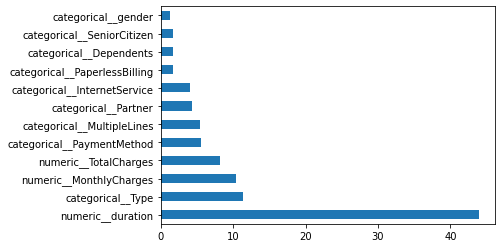

In [107]:

feat_importances = pd.Series(pipeline_cb['model'].feature_importances_, index=pipeline_cb['preprocessor'].get_feature_names_out())
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Таким образом, самые важные признаки оказались длительность договра, тип оплаты (ежемесячный, годовой) и  ежемесячные траты на услуги связи. Что соответствует здравому смыслу, если форма оплаты годовая логично, что клиент с меньшей вероятностью расторгнет догвор, а также лояльные клиенты, которые уже долго пользуются услугами компании.

## Матрица ошибок

In [108]:
from sklearn.metrics import confusion_matrix

In [109]:
# Предсказанные значения
y_pred = best_model_cb.predict(features_test)

# Истинные значения
y_true = target_test

# Получение матрицы ошибок
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[1448   17]
 [ 107  186]]


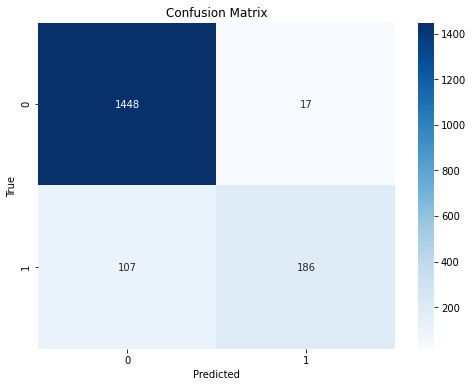

In [110]:
# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [111]:
target_test.value_counts()

0    1465
1     293
Name: Exited, dtype: int64

Таким образом, модель пропустила 107 клиентов из 293, которые собирались уйти, что составляет 36% довольно много, но в то же время модель определила 17 клиентов (около 1%) как желающих уйти, но они уходить не собирались, соответственно им были предложены промокоды и этот убыток не так велик.

# Отчет по решению

Мы проанализировали данные оператора связи «Ниединогоразрыва.ком».

В рамках исследования необходимо было выполнить следующие пункты:
- провести EDA
- Разделить исходные данные на обучающую и тестовую выборки
- Провести кодирование категориальных признаков
- Создадим переменные для признаков и целевого признака
- Обучение моделей с подбором гиперпараметров
- Выбрать лучшую модель
- Провести финальное тестирование

Все шаги работы были успешно выполнены. На этапе предобработки данных были изменены типы данных, удаленны лишние признаки и сгенерирован новый признак 'Длительность договора'. 

Также было проведено исследование признаков на мультиколлинеарность, после чего были удаленны лишние признаки.

В данных был выявлен дисбаланс классов 84 на 16%. Для оценки моделей использовалась метрика AUC-ROC, которая не чувствительна к балансу классов.

Для построения модели машиного обучения были использованы количественные признаки:

  - MonthlyCharges  
  - TotalCharges   
  - duration 
  
А также категориальные признаки:

   - Type              
   - PaperlessBilling  
   - PaymentMethod    
   - gender 
   - Dependents
   - SeniorCitizen      
   - Partner           
   - InternetService  
   - MultipleLines

Были построенны модели LogisticRegression, CatBoostClassifier ,RandomForestClassifier.

Наилучшей моделью с показателем AUC-ROC на кроссвалидации 0.91 оказалась модель CatBoostClassifier со следующимим гиперпараметрами: model__depth: 5, model__learning_rate: 0.1, random_state: 220523

Так же был проведен анализ важности признаков выбранной модели, в ходе которго выявленно, что самые важные признаки это
 - длительность договра, 
 - тип оплаты (ежемесячный, годовой),
 - ежемесячные траты на услуги связи.
 
Что соответствует здравому смыслу, если форма оплаты годовая логично, что клиент с меньшей вероятностью расторгнет догвор, а также лояльные клиенты, которые уже долго пользуются услугами компании.

Значение AUC-ROC  модели на тестовой выборке составилo 0.92, что соответствует заявленному целевому уровню больше 0.85.

Была составлена матрица ошибок, где наглядно представленно количество  правильных и ложно определенных моделью клиентов в соответствии с классом ( ушел/не ушел). На основании которой в дальнейшем можно расчитать бизнесс метрики о затратах на промокоды, а также об убытках, связанных с утраченными клиентами.

